#**Our First Neural Network**

We are going to import the MNIST dataset, and train our first neural network! Don't worry too much about what the arguments / parameters are that we are specifying when we get to the neural net piece; we will go over those elements subsequently.

#*Data and Library Imports*

In [ ]:
from platform import python_version

print(python_version())

3.9.16


In [ ]:
import sys
print(sys.executable)
print(sys.version)
print(sys.version_info)

/usr/bin/python3
3.9.16 (main, Dec  7 2022, 01:11:51) 
[GCC 9.4.0]
sys.version_info(major=3, minor=9, micro=16, releaselevel='final', serial=0)


In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image as im
from IPython.display import Image

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11490434/11490434 [==============================] - 2s 0us/step


We have 60,000 images, and each is made up of 28x28 = 784 pixels.

In [ ]:
train_images.shape

(60000, 28, 28)

Pixels take on values between 0 and 255.

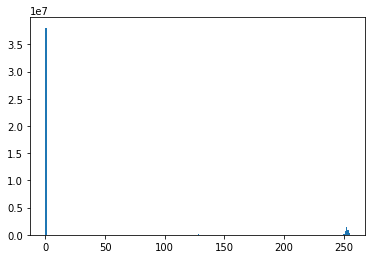

,0
count,4.704000e+07
mean,3.331842e+01
std,7.856749e+01
min,0.000000e+00
25%,0.000000e+00
50%,0.000000e+00
75%,0.000000e+00
max,2.550000e+02


In [ ]:
train_vector = np.reshape(train_images,-1)

plt.hist(train_vector, bins=256)
plt.title="Histogram of Pixel Values"
plt.show()

pd.DataFrame(train_vector).describe()

Let's see what one of these arrays looks like as a picture... 

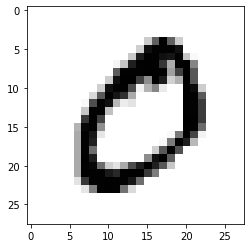

In [ ]:
plt.imshow(train_images[1],cmap=plt.cm.binary)
plt.show()

Every image array has a single label associated with it, an integer between 0 and 9.

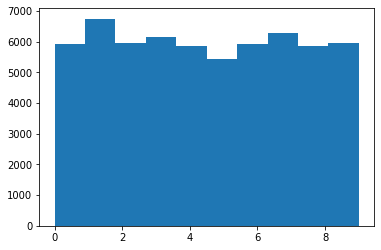

,0
count,60000.000000
mean,4.453933
std,2.889270
min,0.000000
25%,2.000000
50%,4.000000
75%,7.000000
max,9.000000


In [ ]:
plt.hist(train_labels,bins=10)
plt.show()

pd.DataFrame(np.reshape(train_labels,-1)).describe()

#*Train a Neural Net*

In [ ]:
tf.config.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

We need to reformat the data. We need to convert the values into floats (fractional values), scaled to the 0-1 range. Further, we need to reshape each of the 28x28 arrays into individual vectors of length 784. 

In [ ]:
train_images = train_images.reshape(len(train_images),28*28)
train_images = train_images.astype(float)/255
test_images = test_images.reshape(len(test_images),28*28)
test_images = test_images.astype(float)/255
print(train_images.shape)
test_images.shape

(60000, 784)


(10000, 784)

Now we will instantiate our first neural network. We begin by loading the Keras library, specifying the structure of each layer in the network, and indicating what activation function we will use in each layer. 

In [ ]:
from tensorflow import keras 
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])

Next, we will indicate some configuration parameters. In particular, what optimization algorithm to use (RMSProp), what loss function to use (multinomial cross-entropy), and what metric to optimize on (accuracy).

In [ ]:
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

Now we can 'fit' the model to the training data. We will come back to what these arguments mean, but batch_size refers to the number of observations that are used in a given iteration of the optimization, an epoch refers to a complete run through of iterations such that the entire sample of training data is 'covered' (60000 / 128 batches per epoch in this case). Thus, 5 epochs means that we repeat the optimization procedure over the whole dataset 5 times.



In [ ]:
model.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 3s 3ms/step - loss: 2.2370 - accuracy: 0.2650
Epoch 2/5
469/469 [==============================] - 1s 3ms/step - loss: 1.6712 - accuracy: 0.5987
Epoch 3/5
469/469 [==============================] - 1s 3ms/step - loss: 1.0406 - accuracy: 0.7500
Epoch 4/5
469/469 [==============================] - 1s 3ms/step - loss: 0.7453 - accuracy: 0.8097
Epoch 5/5
469/469 [==============================] - 2s 4ms/step - loss: 0.6025 - accuracy: 0.8399


Now that we have fit the model, we can use it to generate productions on the holdout data. Note that the output is comprised of 10 class labels. The predictions are probabilistic, and sum to 1. So, of the resulting 10 predictions, the index for the highest value is the most probable class.  

In [ ]:
predictions = model.predict(test_images)
predictions[1:5]

313/313 [==============================] - 0s 1ms/step


array([[2.4677487e-02, 1.2255517e-03, 6.5424466e-01, 7.3510379e-02,
        3.2204935e-05, 3.7165884e-02, 1.8352467e-01, 2.7375158e-06,
        2.5604809e-02, 1.1633837e-05],
       [4.9888382e-05, 9.3592751e-01, 1.6786803e-02, 1.2618014e-02,
        2.0560452e-03, 6.3247476e-03, 4.1112201e-03, 1.1515762e-02,
        7.3298072e-03, 3.2802126e-03],
       [9.8587078e-01, 9.6827293e-09, 8.4112637e-04, 3.4626020e-04,
        3.6948542e-05, 1.0998545e-02, 1.4258504e-03, 6.1260180e-05,
        3.5443279e-04, 6.4809683e-05],
       [3.8554359e-03, 9.2605893e-05, 1.6990840e-02, 9.9871971e-04,
        6.6780710e-01, 9.0614678e-03, 1.9142976e-02, 6.1251536e-02,
        9.1438983e-03, 2.1165542e-01]], dtype=float32)

As you can see, it's very accurate! 

In [ ]:
result = pd.DataFrame(test_labels,np.argmax(predictions,axis=1))
print(result[1:10])

   0
2  2
1  1
0  0
4  4
1  1
9  4
9  9
6  5
9  9


We can use the Keras-inherent functions to return accuracy and loss pretty easily. Notice that the accuracy of predictions in the test data is lower than that in the training data. 

In [ ]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print("test_acc: ",test_acc)

313/313 [==============================] - 1s 4ms/step - loss: 0.5378 - accuracy: 0.8537
test_acc:  0.8536999821662903
